# 머신러닝 프레임워크 : scikit - learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터딩 차원축소법이 가능하면 샘플데이터로 제공함 

In [7]:
# XOR 연산 학습해보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [8]:
import pandas as pd
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2] #Feature Columns
xor_label = xor_df.iloc[:,2] # Target Column

In [9]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

clf = svm.SVC()
clf.fit(xor_data,xor_label)
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [10]:
# 정답률 구하기
as_score = metrics.accuracy_score(xor_label,pred)
print("정답률 :",as_score)

정답률 : 1.0


In [11]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
clf.score(xor_data,xor_label)

1.0

---
### 붓꽃의 품종 분류하기


In [12]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# 기본 통계량 확인하기
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# NaN 확인하기
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [15]:
iris.loc[(iris['Name']=='Iris-setosa'),'Color']='red'
iris.loc[(iris['Name']=='Iris-versicolor'),'Color']='violet'
iris.loc[(iris['Name']=='Iris-virginica'),'Color']='purple'

In [16]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [17]:
# Scatter 그려보기
import matplotlib.pyplot as plt

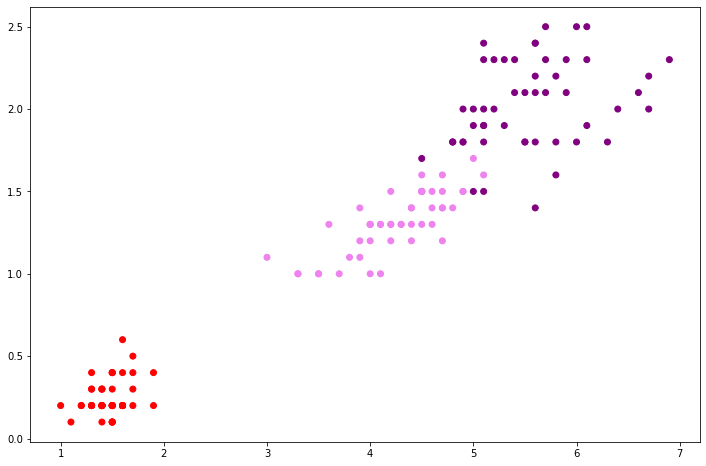

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'],
    c = iris['Color'],
)
#plt.xlabel("Petal Length")
#plt.ylabel("Petal Length")
plt.show()

In [19]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [20]:
# 학습용 데이터와 테스트용 데이터로 나누기 
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(iris_data,iris_label)

In [21]:
# 학습 시키기 
clf = svm.SVC()
clf.fit(train_data,train_label)


SVC()

In [22]:
# 예측하기
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa']


In [23]:
# 정답률
ac_score = metrics.accuracy_score(test_label,pred)
print("정답률 :",ac_score)

정답률 : 0.9736842105263158


In [24]:
# Training 정답률, Test 정답률
print(clf.score(train_data,train_label))
print(clf.score(test_data,test_label))

0.9732142857142857
0.9736842105263158


In [25]:
# 분류 Report() : Confusion matrix
cl_report = metrics.classification_report(test_label,pred)
print(cl_report)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



In [26]:
question = [4.1,3.5,1.4,0.2]
answer = clf.predict([question])
answer

array(['Iris-setosa'], dtype=object)

---
### 분류 Report 이해하기

# Python Code로 확인하기

In [27]:
import numpy as np

In [28]:
y = np.array([1,1,1,1,0,0])
# 정답 : 1은 음치, 0은 정상

p = np.array([1,1,0,0,0,0])
# 에측 

# 정확도 
accuracy = np.mean(np.equal(y,p))
print('accuracy :',accuracy)

# 정밀도
right = np.sum(y * p ==1)
precision = right / np.sum(p)
print('precision :',precision)

# 재현율
recall = right/np.sum(y)
print('recall :',recall)

# fl score
f1 = 2*precision*recall/(precision+recall)
print('f1 score:',f1)

accuracy : 0.6666666666666666
precision : 1.0
recall : 0.5
f1 score: 0.6666666666666666


In [30]:
# sklearn을 이용
print('accuracy :',metrics.accuracy_score(y,p))
print('precision :',metrics.precision_score(y,p))
print('recall :',metrics.recall_score(y,p))
print('f1 score :',metrics.f1_score(y,p))

accuracy : 0.6666666666666666
precision : 1.0
recall : 0.5
f1 score : 0.6666666666666666
